# NYC 311 API

You've gotten a chance to explore API basics through the Yelp API. In preparation for your final project, we will investigate another API from scratch. This should provide you with another familiar dataq option as well as practice for applying the same process to new unfamiliar APIs.

To start, go over to the API documentation at: 

https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv


<img src="311_api_docs.png">

## Make an initial API call to retrieve 311 complaints from a neighborhood or zip code of your choice.

In [ ]:
# Your code here

In [2]:
# Formulation 1

#token = 'Z3dVA3KBniPgZlDEtKycvsOKz' #This app token is posted to make teachers demonstration easier. 
#Please use sparingly. Overuse will lead to blacklisting and the token will be rendered useless.


#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", token)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("fhrw-4uyv", incident_zip = '11204', limit=2000)

In [3]:
# Formulation 2
import requests
import pandas as pd

zip_code = '11204'

# can't figure out date ranges at the moment...
start_date = '2018-01-01T12:00:00'
end_date = '2018-02-01T12:00:00'

# create pull request based on parameters
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?incident_zip={}".format(zip_code)

# do the pull
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
else:
    print('Hit an error.')

## Briefly Explore the Structure of the Response You Received.

In [4]:
#Formulation 1
type(results)

list

In [5]:
len(results)

2000

In [6]:
results[0]

{'address_type': 'ADDRESS',
 'agency': 'NYPD',
 'agency_name': 'New York City Police Department',
 'bbl': '3061710058',
 'borough': 'BROOKLYN',
 'city': 'BROOKLYN',
 'closed_date': '2018-10-29T03:08:00.000',
 'community_board': '11 BROOKLYN',
 'complaint_type': 'Blocked Driveway',
 'created_date': '2018-10-29T02:57:40.000',
 'cross_street_1': '17 AVENUE',
 'cross_street_2': '18 AVENUE',
 'descriptor': 'No Access',
 'due_date': '2018-10-29T10:57:40.000',
 'facility_type': 'Precinct',
 'incident_address': '1763 71 STREET',
 'incident_zip': '11204',
 'latitude': '40.61627769992391',
 'location': {'type': 'Point',
  'coordinates': [-73.994600708906, 40.616277699924]},
 'location_type': 'Street/Sidewalk',
 'longitude': '-73.99460070890645',
 'open_data_channel_type': 'ONLINE',
 'park_borough': 'BROOKLYN',
 'park_facility_name': 'Unspecified',
 'resolution_action_updated_date': '2018-10-29T03:08:00.000',
 'resolution_description': 'The Police Department responded to the complaint and took ac

In [7]:
# Formulation 2
print(type(data))

<class 'list'>


In [8]:
len(data)

1000

In [9]:
data[0]

{'address_type': 'ADDRESS',
 'agency': 'NYPD',
 'agency_name': 'New York City Police Department',
 'bbl': '3061710058',
 'borough': 'BROOKLYN',
 'city': 'BROOKLYN',
 'closed_date': '2018-10-29T03:08:00.000',
 'community_board': '11 BROOKLYN',
 'complaint_type': 'Blocked Driveway',
 'created_date': '2018-10-29T02:57:40.000',
 'cross_street_1': '17 AVENUE',
 'cross_street_2': '18 AVENUE',
 'descriptor': 'No Access',
 'due_date': '2018-10-29T10:57:40.000',
 'facility_type': 'Precinct',
 'incident_address': '1763 71 STREET',
 'incident_zip': '11204',
 'latitude': '40.61627769992391',
 'location': {'type': 'Point',
  'coordinates': [-73.994600708906, 40.616277699924]},
 'location_type': 'Street/Sidewalk',
 'longitude': '-73.99460070890645',
 'open_data_channel_type': 'ONLINE',
 'park_borough': 'BROOKLYN',
 'park_facility_name': 'Unspecified',
 'resolution_action_updated_date': '2018-10-29T03:08:00.000',
 'resolution_description': 'The Police Department responded to the complaint and took ac

## Create a Pandas DataFrame of the Data From the Response

In [10]:
# Formulation 1 
df = pd.DataFrame(results)

print(len(df))
print(df.columns)
df.head()

2000
Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough', 'city',
       'closed_date', 'community_board', 'complaint_type', 'created_date',
       'cross_street_1', 'cross_street_2', 'descriptor', 'due_date',
       'facility_type', 'incident_address', 'incident_zip',
       'intersection_street_1', 'intersection_street_2', 'latitude',
       'location', 'location_type', 'longitude', 'open_data_channel_type',
       'park_borough', 'park_facility_name', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name',
       'taxi_company_borough', 'taxi_pick_up_location', 'unique_key',
       'x_coordinate_state_plane', 'y_coordinate_state_plane'],
      dtype='object')


,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,taxi_company_borough,taxi_pick_up_location,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,NYPD,New York City Police Department,3061710058,BROOKLYN,BROOKLYN,2018-10-29T03:08:00.000,11 BROOKLYN,Blocked Driveway,2018-10-29T02:57:40.000,...,Unspecified,2018-10-29T03:08:00.000,The Police Department responded to the complai...,Closed,71 STREET,NaN,NaN,40695291,985749,163803
1,ADDRESS,HPD,Department of Housing Preservation and Develop...,3062080044,BROOKLYN,BROOKLYN,NaN,11 BROOKLYN,WATER LEAK,2018-10-29T21:53:03.000,...,Unspecified,2018-10-29T00:00:00.000,The following complaint conditions are still o...,Open,BAY PARKWAY,NaN,NaN,40695280,987971,161112
2,ADDRESS,HPD,Department of Housing Preservation and Develop...,3062080044,BROOKLYN,BROOKLYN,NaN,11 BROOKLYN,UNSANITARY CONDITION,2018-10-29T21:53:02.000,...,Unspecified,2018-10-29T00:00:00.000,The following complaint conditions are still o...,Open,BAY PARKWAY,NaN,NaN,40695270,987971,161112
3,ADDRESS,HPD,Department of Housing Preservation and Develop...,3065950001,BROOKLYN,BROOKLYN,NaN,11 BROOKLYN,UNSANITARY CONDITION,2018-10-29T12:27:25.000,...,Unspecified,2018-10-29T00:00:00.000,The following complaint conditions are still o...,Open,BAY PARKWAY,NaN,NaN,40695114,988219,161415
4,ADDRESS,NYPD,New York City Police Department,3055120067,BROOKLYN,BROOKLYN,2018-10-30T02:19:06.000,12 BROOKLYN,Blocked Driveway,2018-10-29T16:30:56.000,...,Unspecified,2018-10-29T16:57:52.000,The Police Department responded to the complai...,Closed,60 STREET,NaN,NaN,40695369,987975,165752


In [11]:
# Formulation 2 
df = pd.DataFrame(data)

print(len(df))
print(df.columns)
df.head()

1000
Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough', 'city',
       'closed_date', 'community_board', 'complaint_type', 'created_date',
       'cross_street_1', 'cross_street_2', 'descriptor', 'due_date',
       'facility_type', 'incident_address', 'incident_zip',
       'intersection_street_1', 'intersection_street_2', 'latitude',
       'location', 'location_type', 'longitude', 'open_data_channel_type',
       'park_borough', 'park_facility_name', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'],
      dtype='object')


,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,taxi_pick_up_location,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,NYPD,New York City Police Department,3061710058,BROOKLYN,BROOKLYN,2018-10-29T03:08:00.000,11 BROOKLYN,Blocked Driveway,2018-10-29T02:57:40.000,...,BROOKLYN,Unspecified,2018-10-29T03:08:00.000,The Police Department responded to the complai...,Closed,71 STREET,NaN,40695291,985749,163803
1,ADDRESS,HPD,Department of Housing Preservation and Develop...,3062080044,BROOKLYN,BROOKLYN,NaN,11 BROOKLYN,WATER LEAK,2018-10-29T21:53:03.000,...,BROOKLYN,Unspecified,2018-10-29T00:00:00.000,The following complaint conditions are still o...,Open,BAY PARKWAY,NaN,40695280,987971,161112
2,ADDRESS,HPD,Department of Housing Preservation and Develop...,3062080044,BROOKLYN,BROOKLYN,NaN,11 BROOKLYN,UNSANITARY CONDITION,2018-10-29T21:53:02.000,...,BROOKLYN,Unspecified,2018-10-29T00:00:00.000,The following complaint conditions are still o...,Open,BAY PARKWAY,NaN,40695270,987971,161112
3,ADDRESS,HPD,Department of Housing Preservation and Develop...,3065950001,BROOKLYN,BROOKLYN,NaN,11 BROOKLYN,UNSANITARY CONDITION,2018-10-29T12:27:25.000,...,BROOKLYN,Unspecified,2018-10-29T00:00:00.000,The following complaint conditions are still o...,Open,BAY PARKWAY,NaN,40695114,988219,161415
4,ADDRESS,NYPD,New York City Police Department,3055120067,BROOKLYN,BROOKLYN,2018-10-30T02:19:06.000,12 BROOKLYN,Blocked Driveway,2018-10-29T16:30:56.000,...,BROOKLYN,Unspecified,2018-10-29T16:57:52.000,The Police Department responded to the complai...,Closed,60 STREET,NaN,40695369,987975,165752


## Create a Histogram of the Complaint Types From Your Dataset

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

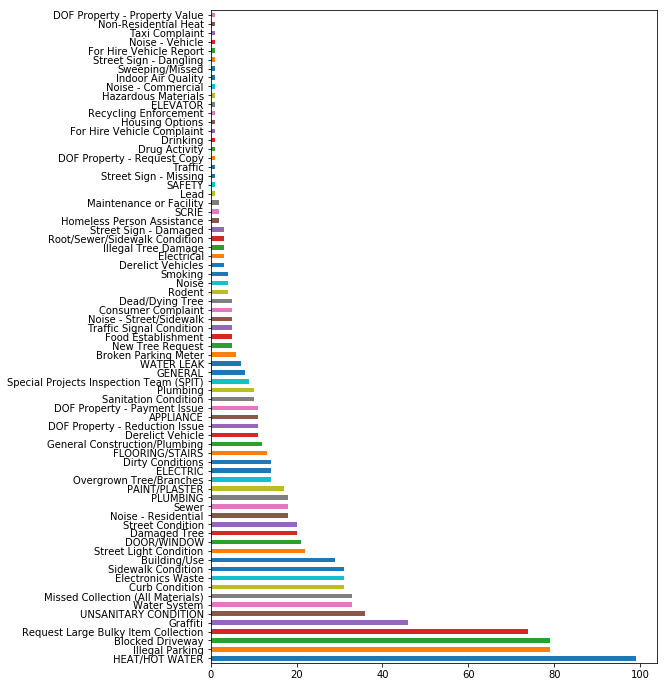

In [13]:
# Your code here 
df.complaint_type.value_counts().plot(kind='barh', figsize=(8,12))